**Backpropagation Algorithm :**

The Backpropagation Algorithm is a supervised learning method in neural networks where the weights are adjusted based on the gradient of the error signal, propagating from the output layer back to the input layer for training purposes.

In machine learning, backpropagation is an effective algorithm used to train artificial neural networks, especially in feed-forward neural networks.

Backpropagation is an iterative algorithm, that helps to minimize the cost function by determining which weights and biases should be adjusted.

During every epoch, the model learns by adapting the weights and biases to minimize the loss by moving down toward the gradient of the error.

Thus, it involves the two most popular optimization algorithms, such as gradient descent or stochastic gradient descent.

Computing the gradient in the backpropagation algorithm helps to minimize the cost function and it can be implemented by using the mathematical rule called chain rule from calculus to navigate through complex layers of the neural network.

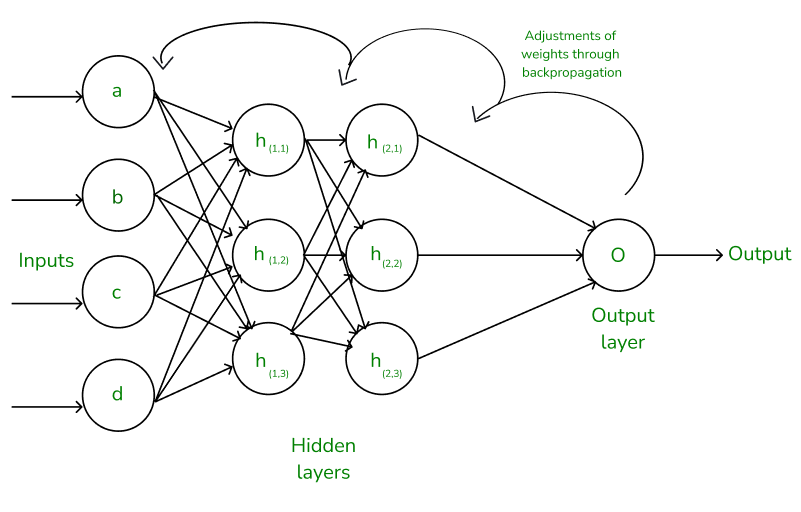

### **7.Build an Artificial Neural Network by implementing the Backpropagation algorithmandtest the same using appropriate data sets**

**Import Required Libraries**

These are essential libraries for loading data, pre-processing, training the model, and evaluating its performance.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt  # For plotting loss


**Load and Pre-process the Data**

In this step, the Iris dataset is loaded. It’s then split into features (X) and labels (y), and the labels are one-hot encoded for multi-class classification.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to pandas DataFrame
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = iris.target

# 1. Basic Information
print(iris_df.head())
print("\nData description:")
print(iris_df.describe())

# 2. Checking for missing values
print("\nMissing values:\n", iris_df.isnull().sum())



NameError: name 'X' is not defined

In [4]:
# 3. Distribution of features
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.histplot(iris_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# 4. Class Distribution
sns.countplot(x=iris_df['target'])
plt.title('Target Class Distribution')
plt.show()

# 5. Pair Plot
sns.pairplot(iris_df, hue='target')
plt.show()

# 6. Correlation Matrix and Heatmap
corr_matrix = iris_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



NameError: name 'iris' is not defined

<Figure size 1200x800 with 0 Axes>

In [5]:
# Load dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target.reshape(-1, 1)  # Labels

# One-hot encode the target (for multi-class classification)
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)


**Split the Dataset into Training and Test Sets**

To evaluate the model, the dataset is split into a training set and a test set (30% for testing).

In [6]:
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42)


**Initialize the Neural Network Architecture**

Define the architecture of the neural network, including the number of input features, hidden neurons, and output neurons. Initialize the weights and biases randomly.

In [7]:
# Define the architecture
input_size = X_train.shape[1]  # Number of input features (4)
hidden_size = 10  # Number of neurons in the hidden layer
output_size = y_train.shape[1]  # Number of output classes (3)

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Learning rate
lr = 0.01


**Define Activation Functions (Sigmoid and Softmax)**

Activation functions like Sigmoid and Softmax are defined to handle non-linearity in the hidden layer and convert logits to probabilities in the output layer.

In [8]:
# Sigmoid activation and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

# Softmax activation for output layer (multiclass classification)
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


**Define Forward Propagation**

Forward propagation calculates the outputs (activations) of the neural network layers.

In [9]:
# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


**Define Backpropagation**

Backpropagation calculates the gradients and updates the weights and biases based on the loss function.

In [10]:
# Backward propagation (gradient calculation)
def backward_propagation(X, y, Z1, A1, A2, W1, W2, b1, b2):
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    return W1, b1, W2, b2


**Train the Neural Network**
Train the neural network over a number of epochs and calculate the loss at each epoch. Store the loss to plot it later.

In [11]:
# Train the network
epochs = 1000
losses = []  # Store loss for plotting

for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2)

    # Cross-entropy loss
    loss = -np.mean(np.sum(y_train * np.log(A2), axis=1))
    losses.append(loss)  # Append loss for plotting

    # Backpropagation
    W1, b1, W2, b2 = backward_propagation(X_train, y_train, Z1, A1, A2, W1, W2, b1, b2)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')


Epoch 0, Loss: 2.0065545944112353
Epoch 100, Loss: 0.541098212612024
Epoch 200, Loss: 0.7066421958881677
Epoch 300, Loss: 0.8829991045688825
Epoch 400, Loss: 0.35278230686255985
Epoch 500, Loss: 0.20372062931260834
Epoch 600, Loss: 0.17940406708192974
Epoch 700, Loss: 0.1640035146584281
Epoch 800, Loss: 0.14997821990982788
Epoch 900, Loss: 0.12915780717365352


**Test the Neural Network**
After training, test the network on the test data and calculate the accuracy.

In [12]:
# Test the network
_, _, _, A2_test = forward_propagation(X_test, W1, b1, W2, b2)
predictions = np.argmax(A2_test, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, predictions)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')


Accuracy on test set: 97.78%


**Plot the Loss over Epochs**
plot the learning curve to see how the loss changes over epochs.

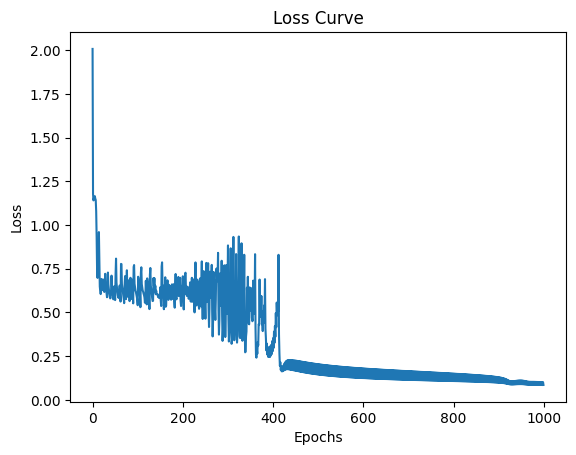

In [13]:
# Plot the loss curve
plt.plot(losses)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
